# Risk Analysis

## Initialization

In [1]:
import math 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

## Data Generation \ Loading

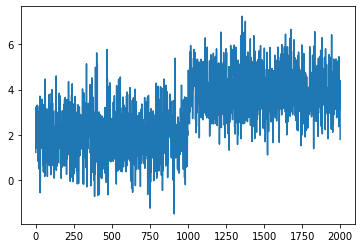

In [3]:
N = 1000
Xtrain_1 = 2 + np.random.randn(N, 1)
ytrain_1 = np.zeros((N, 1))
Xtrain_2 = 4 + np.random.randn(N, 1)
ytrain_2 = np.ones((N, 1))
X_train = np.vstack((Xtrain_1, Xtrain_2))
y_train = np.vstack((ytrain_1, ytrain_2))

Xtest_1 = 2 + np.random.randn(int(N/2), 1)
ytest_1 = np.zeros((int(N/2), 1))
Xtest_2 = 4 + np.random.randn(int(N/2), 1)
ytest_2 = np.ones((int(N/2), 1))

X_test = np.vstack((Xtest_1, Xtest_2))
y_test = np.vstack((ytest_1, ytest_2))
plt.plot(X_train)

In [5]:
def mean(X):
    return sum(X)/float(len(X))

def stdv(X):
    avg = mean(X)
    variance = sum([(x - avg)**2 for x in X])/float(len(X) - 1)
    return math.sqrt(variance)

In [6]:
def calculate_probability(x, mean, stdev, prior, l):
    exponent = math.exp(-((x-mean)**2 / (2 * stdev**2 )))
    return l*prior*(1 / (math.sqrt(2 * math.pi) * stdev)) * exponent

In [13]:
m1 = mean(Xtrain_1)
m2 = mean(Xtrain_2)
s1 = stdv(Xtrain_1)
s2 = stdv(Xtrain_2)
l1 = 5
l2 = 1
p = 0.5
label = []
for item in range(len(X_test)):
    p1 = calculate_probability(X_test[item],m1, s1, p, l1)
    p2 = calculate_probability(X_test[item], m2, s2, 1-p, l2)
    if p1 > p2:
        label.append(0)
    else:
        label.append(1)

In [14]:
# 2*confusion_matrix(y_test, np.array(label))/len(y_test)
confusion_matrix(y_test, np.array(label))

array([[485,  15],
       [206, 294]], dtype=int64)